Dataset créé avec succès !

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Statistiques descriptives:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000               200.00000
mean   100.500000   44.405000           75.635000                50.55000
std     57.879185   15.353816           35.410752                30.07758
min      1.000000   18.000000           15.000000                 1.00000
25%     50.750000   32

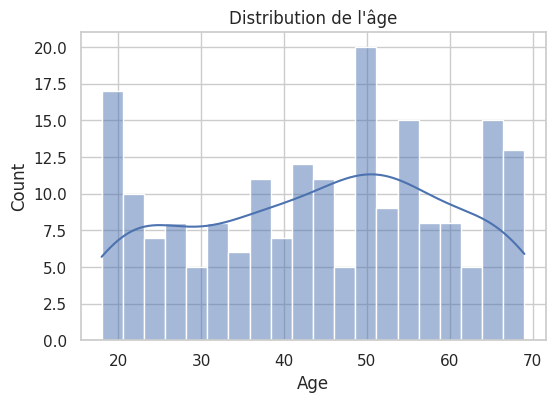

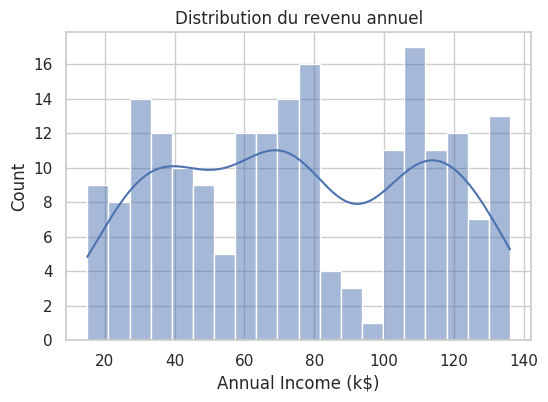

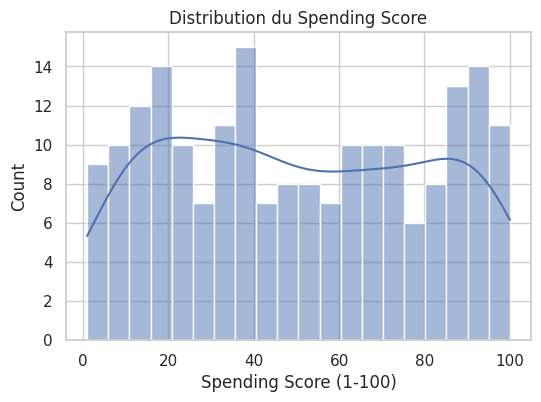

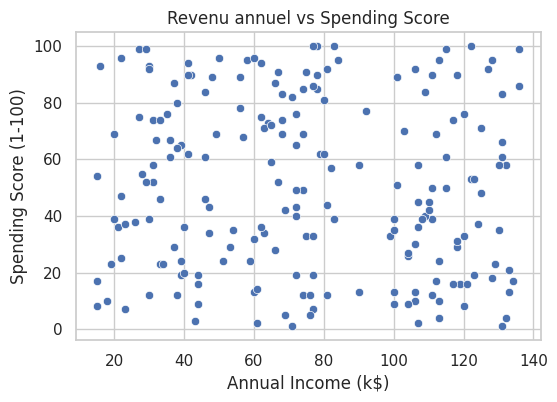

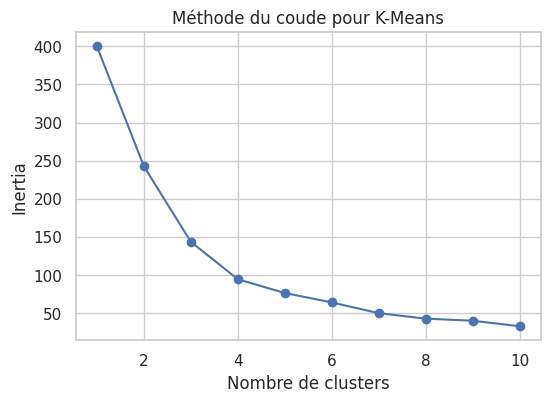

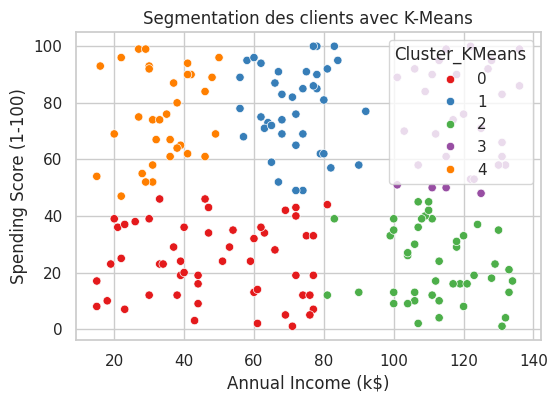

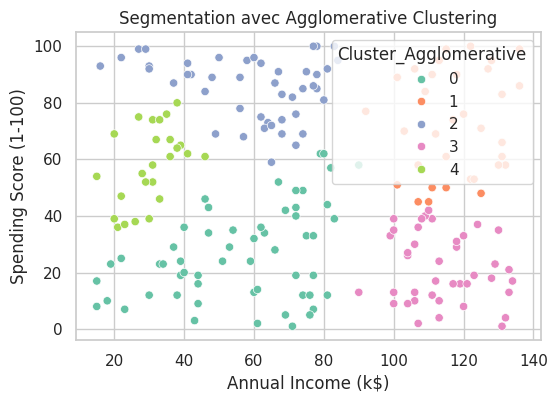


Moyennes par cluster (K-Means) :


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster_Agglomerative
Cluster_KMeans,,,,,
0,104.339623,45.566038,49.018868,24.132075,0.452830
1,100.641026,41.923077,71.666667,77.871795,1.615385
2,102.545455,46.000000,112.363636,22.727273,2.772727
3,109.741935,43.677419,118.516129,74.516129,1.000000
4,82.757576,44.030303,33.818182,75.272727,3.151515


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

sns.set(style="whitegrid")

np.random.seed(42)
n_clients = 200

gender = np.random.choice(['Male', 'Female'], n_clients)
age = np.random.randint(18, 70, n_clients)
annual_income = np.random.randint(15, 137, n_clients)
spending_score = np.random.randint(1, 101, n_clients)

df = pd.DataFrame({
    'CustomerID': range(1, n_clients+1),
    'Genre': gender,
    'Age': age,
    'Annual Income (k$)': annual_income,
    'Spending Score (1-100)': spending_score
})

print("Dataset créé avec succès !")
df.head()


print("\nInformations sur le dataset:")
print(df.info())

print("\nStatistiques descriptives:")
print(df.describe())


plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution de l'âge")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Distribution du revenu annuel")
plt.show()


plt.figure(figsize=(6,4))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Distribution du Spending Score")
plt.show()


plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"]
)
plt.title("Revenu annuel vs Spending Score")
plt.show()


X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia")
plt.title("Méthode du coude pour K-Means")
plt.show()


kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster_KMeans"],
    palette="Set1"
)
plt.title("Segmentation des clients avec K-Means")
plt.show()


agg = AgglomerativeClustering(n_clusters=5)
df["Cluster_Agglomerative"] = agg.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster_Agglomerative"],
    palette="Set2"
)
plt.title("Segmentation avec Agglomerative Clustering")
plt.show()


print("\nMoyennes par cluster (K-Means) :")
df.groupby("Cluster_KMeans").mean(numeric_only=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')